# Summary:

This project is about building a feedforward neural network model to predict the likelihood of admission for graduate applicants based on their profile features. It employs a neural network architecture using the TensorFlow and Keras libraries. The goal is to create a model that accurately estimates an applicant's chance of being admitted to a graduate program by considering various factors, such as GRE scores, TOEFL scores, university ratings, and more. Early stopping is applied to improve efficiency and prevent overfitting during the model training process. The project also includes model evaluation and visualization of training metrics.

__Deep Architecture:__ The model has multiple hidden layers. In this case, it has two hidden layers, which is enough to qualify it as a deep learning model. Deep learning typically involves neural networks with multiple hidden layers, enabling the model to learn complex hierarchical representations.

__Nonlinear Activation Functions:__ The model uses ReLU (Rectified Linear Unit) activation functions in the hidden layers. Deep learning models often rely on nonlinear activation functions to capture complex patterns in the data.

__Training with Backpropagation:__ The model is trained using backpropagation, a key technique in deep learning, where the gradients of the loss function are propagated backward through the network to update the model's parameters.

__Use of Libraries for Deep Learning:__ The code leverages deep learning libraries such as TensorFlow and Keras to define, train, and evaluate the neural network model.

# Project Goals and Objectives:

The primary objectives of this project are as follows:

__Model Development:__
Build a deep learning model to predict the probability of an applicant being admitted to a graduate program. This model takes into account various academic and application-related factors.

__Feature Engineering:__
Select and preprocess relevant features from the dataset to train the model effectively. Features such as GRE scores, TOEFL scores, and university ratings are used as input.

__Model Evaluation:__ Assess the performance of the trained model using appropriate evaluation metrics, such as Mean Absolute Error (MAE) and R-squared (R2) score.

__Early Stopping:__ Implement early stopping as a regularization technique to halt training when the validation loss stops improving. This helps prevent overfitting.

__Visualizations:__ Create plots to visualize the model's training progress, showing changes in MAE and loss over each training epoch.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [36]:
# load admissions data
dataset = pd.read_csv("admissions_data.csv")

Features of the "admissions_data.csv" Dataset:

The "admissions_data.csv" dataset contains information about graduate applicants and their attributes. The dataset is structured as follows:

* Serial No.: Index of each row (1-500)
* GRE Score: GRE test score (out of 340)
* TOEFL Score: TOEFL test score (out of 120)
* University Rating: Evaluated university rating (out of 5)
* SOP: Statement of Purpose Strength (out of 5)
* LOR: Letter of Recommendation Strength (out of 5)
* CGPA: Undergraduate GPA (out of 10)
* Research: Has research experience (either 0 or 1)
* Chance of Admit: Applicant’s chance of being admitted (ranging from 0 to 1)

In [37]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


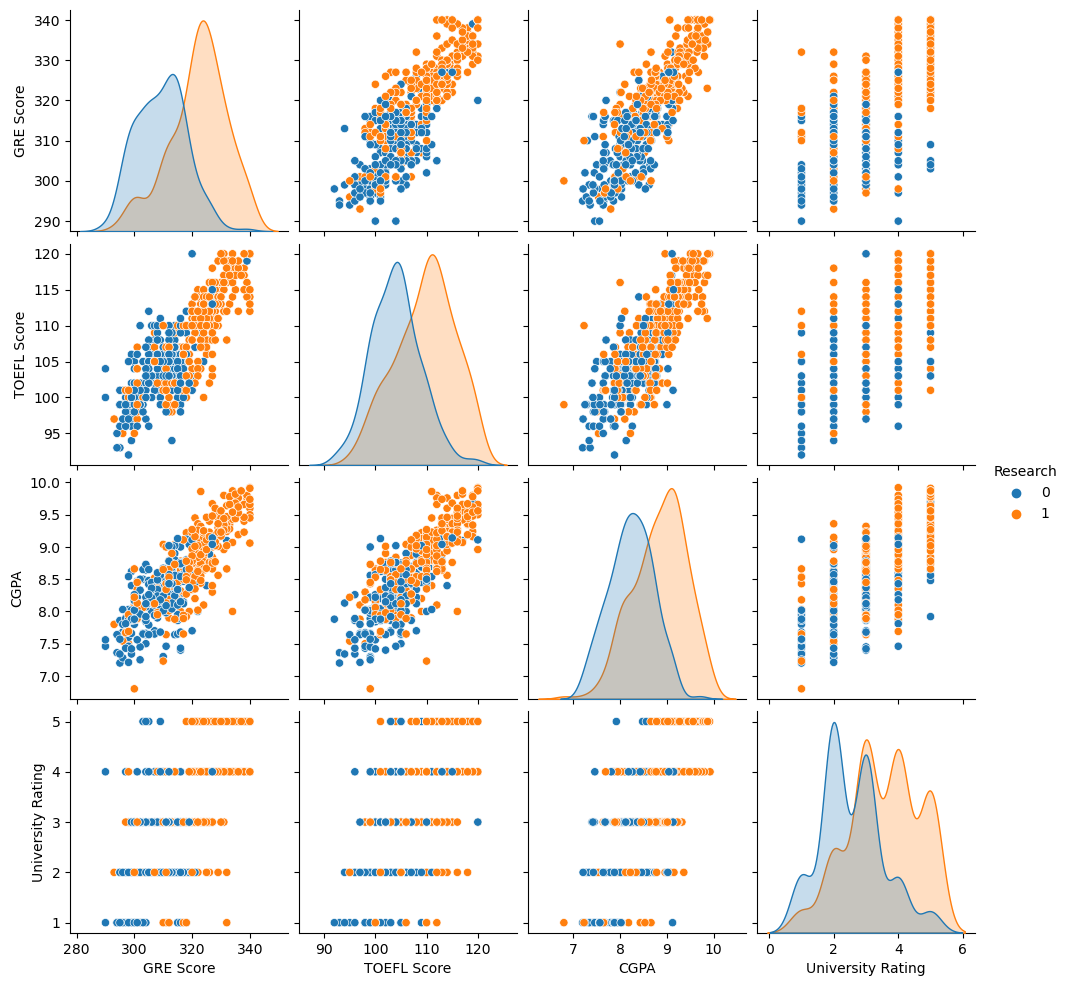

In [40]:
import seaborn as sns
sns.pairplot(dataset, vars=["GRE Score", "TOEFL Score", "CGPA", "University Rating"], hue="Research")
plt.show()

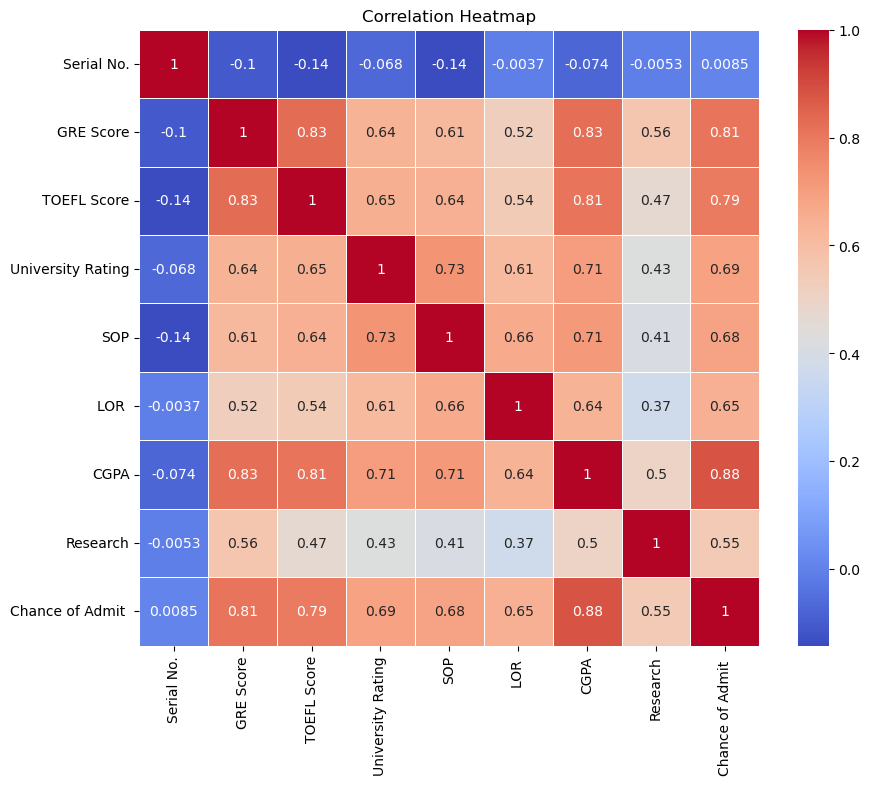

In [41]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

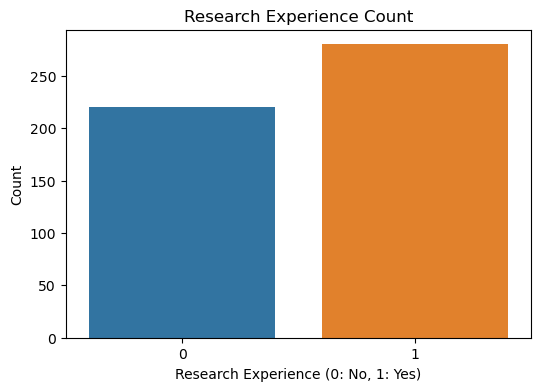

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x="Research")
plt.title('Research Experience Count')
plt.xlabel('Research Experience (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

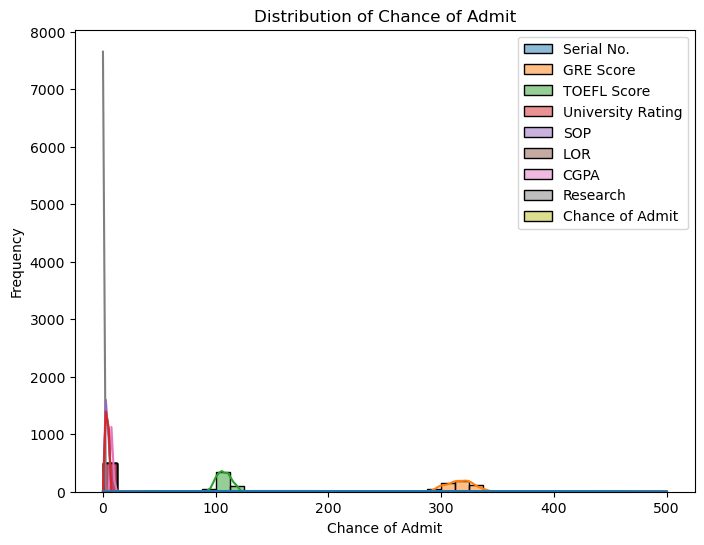

In [43]:
# Plot a histogram or kernel density estimate to understand the distribution of the target variable, "Chance of Admit." This can help identify the overall distribution of admission chances.
plt.figure(figsize=(8, 6))
sns.histplot(dataset, kde=True)
plt.title('Distribution of Chance of Admit')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.show()

In [7]:
labels = dataset.iloc[:,-1]
features = dataset.iloc[:,1:8]

In [8]:
labels.describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit , dtype: float64

In [9]:
features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


In [11]:
#split our training and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 42)

In [12]:
# standardizing our data by scaling it
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

In [13]:
features_train_scale = pd.DataFrame(features_train_scale, columns = features_train.columns)
features_test_scale = pd.DataFrame(features_test_scale, columns = features_test.columns)

features_train_scale.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02
mean,-1.434112e-15,9.338456e-16,-1.480297e-17,-2.359594e-16,-1.158055e-16,-1.374308e-15,-1.314504e-16
std,1.001336e+00,1.001336e+00,1.001336e+00,1.001336e+00,1.001336e+00,1.001336e+00,1.001336e+00
min,-2.162386e+00,-2.506821e+00,-1.827711e+00,-2.400715e+00,-2.144320e+00,-2.964876e+00,-1.116024e+00
25%,-7.045978e-01,-7.056302e-01,-9.590273e-01,-8.885067e-01,-5.154475e-01,-7.520337e-01,-1.116024e+00
50%,2.429648e-02,-5.065167e-02,-9.034315e-02,1.196325e-01,2.750984e-02,-1.996550e-02,8.960383e-01
75%,7.531908e-01,7.680714e-01,7.783410e-01,6.237021e-01,5.704672e-01,7.620165e-01,8.960383e-01
max,2.119868e+00,2.078028e+00,1.647025e+00,1.631841e+00,1.656382e+00,2.226153e+00,8.960383e-01


When designing your own neural network model, consider the following:

* The shape of your input
* Adding hidden layers as well as how many neurons they have
* Including activation functions
* The type of loss function and metrics you use
* The type of gradient descent optimizer you use
* Your learning rate

In [14]:
# function to design the model
def design_model(feature_data):
	model = Sequential()
	num_features = feature_data.shape[1]
	input = tf.keras.Input(shape=(num_features))
	model.add(input)
	# this model has two hidden layers and two dropout layers
	# relu activation function is used at both hidden layers
	hidden_layer = layers.Dense(16, activation='relu')
	model.add(hidden_layer)
	model.add(layers.Dropout(0.1))
	hidden_layer_2 = layers.Dense(8, activation='relu')
	model.add(hidden_layer_2)
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(1))
	# using an adam optimizer with a learning rate of 0.005
	# using mean-squared error as our loss function and mean average error as our metric
	opt = keras.optimizers.Adam(learning_rate=0.005)
	model.compile(loss='mse', metrics=['mae'], optimizer=opt)
	return model

In [15]:
model = design_model(features_train_scale)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [17]:
# apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# fit the model with 100 epochs and a batch size of 8
# validation split at 0.25
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

Epoch 1/100
36/36 [==============================] - 2s 22ms/step - loss: 0.6455 - mae: 0.5721 - val_loss: 0.0886 - val_mae: 0.2284
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1456 - mae: 0.3032 - val_loss: 0.0461 - val_mae: 0.1785
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0894 - mae: 0.2356 - val_loss: 0.0287 - val_mae: 0.1380
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0757 - mae: 0.2109 - val_loss: 0.0185 - val_mae: 0.1128
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0611 - mae: 0.1923 - val_loss: 0.0152 - val_mae: 0.1029
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0410 - mae: 0.1576 - val_loss: 0.0151 - val_mae: 0.1044
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: 0.0339 - mae: 0.1430 - val_loss: 0.0185 - val_mae: 0.1173
Epoch 8/100
36/36 [==============================] - 0s 8ms/step - loss: 0.0299 - 

36/36 [==============================] - 0s 4ms/step - loss: 0.0071 - mae: 0.0620 - val_loss: 0.0036 - val_mae: 0.0500
Epoch 64/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0065 - mae: 0.0609 - val_loss: 0.0032 - val_mae: 0.0453
Epoch 65/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0675 - val_loss: 0.0035 - val_mae: 0.0496
Epoch 66/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0625 - val_loss: 0.0033 - val_mae: 0.0463
Epoch 67/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0640 - val_loss: 0.0031 - val_mae: 0.0411
Epoch 68/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0064 - mae: 0.0602 - val_loss: 0.0035 - val_mae: 0.0468
Epoch 69/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0059 - mae: 0.0573 - val_loss: 0.0030 - val_mae: 0.0434
Epoch 70/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0063 - mae: 0

In [18]:
# evaluate the model
val_mse, val_mae = model.evaluate(features_test_scale, labels_test.to_numpy(), verbose = 0)

# view the MAE performance
print("MAE: ", val_mae)
print("MSE: ", val_mse)

MAE:  0.04667953774333
MSE:  0.004327891860157251


In [22]:
# evauate r-squared score
y_pred = model.predict(features_test_scale)

print(r2_score(labels_test,y_pred))

4/4 [==============================] - 0s 5ms/step
0.7783041745990215


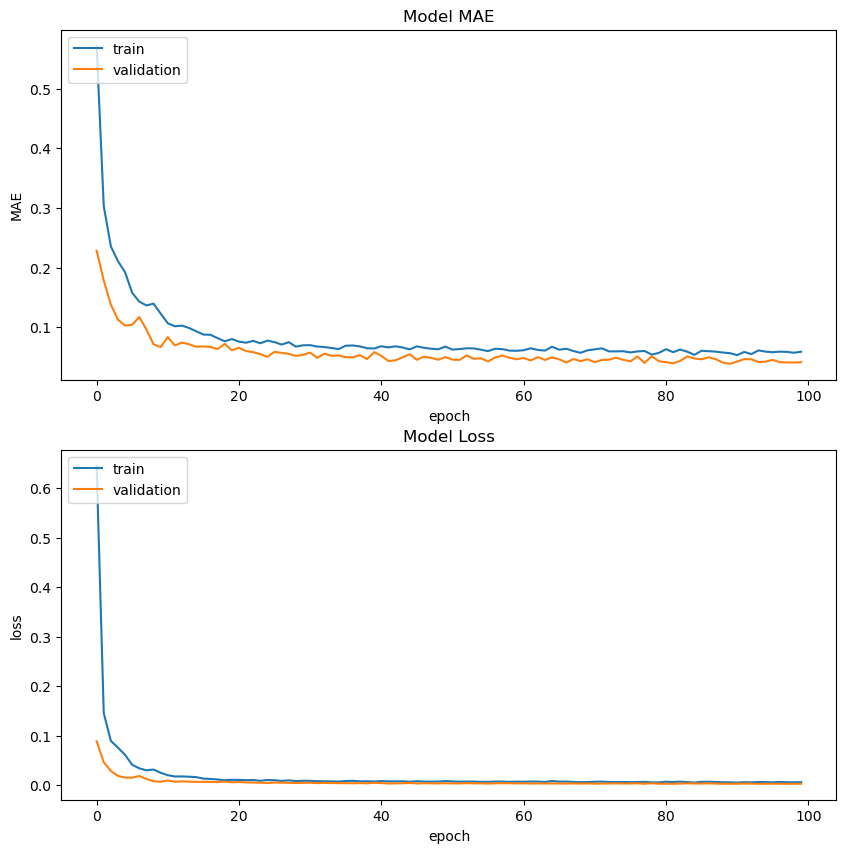

In [23]:
# plot MAE and val_MAE over each epoch
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('Model MAE')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()


# Conclusion
Overall, the project aims to provide a predictive tool that can help evaluate the chances of admission for graduate applicants based on their academic and application-related attributes. It demonstrates the use of neural networks for regression tasks and emphasizes the importance of data preprocessing, model training, and evaluation in machine learning projects.